# Изучение закономерностей, определяющих успешность игр

**Описание проекта**


Интернет-магазину компьютерных игр нужно выявить закономерности, определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 
Для работы доступны данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

**Задача проекта**

Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры. 

**Описание данных:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB.

**План работы:**
- загрузка данных и изучение общей информации
- подготовка данных к анализу (приведение к нужному типу, исправление ошибок, заполнение пропусков)
- исследовательский анализ данных (определение прибыльных игровых платформ и жанров)
- составление портрета пользователя каждого региона
- проверка гипотез
- подведение итогов исследования

## Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [5]:
#определим процент пропусков
data.isnull().sum() / data.shape[0] * 100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

Статистика: 

Период выпуска игр: с 1980 по 2016, больше всего игр вышло в 2006. Некоторые игры в определенных регионах не продавались вообще. Минимальная оценка критиков - 13, максимальная - 98. В среднем  игры получали оценку ок. 69.

Общая информация и пропущенные значения: 

В таблице 16715 строк, 11 столбцов. В названиях столбцов нарушение "змеиного регистра". В шести столбцах есть пропуски, больше всего их в столбцах Critic_Score (51%), Rating и User_Score (по 40%).Представлены два типа данных: object и float64. В двух столбцах неверный тип данных.

**Вывод**

Перед проведением анализа необходимо исправить названия столбцов, заполнить пропуски, изменить тип данных, где это требуется.

## Подготовка данных

Приведем названия столбцов к нижнему регистру:

In [6]:
data.columns = data.columns.str.lower()
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Обработаем пропуски:

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбце name всего 2 пропуска, удалим эти строки:

In [8]:
print('Пропуски до:', data['name'].isna().sum())
data.dropna(subset=['name'],inplace=True)
print('Пропуски после:', data['name'].isna().sum())

Пропуски до: 2
Пропуски после: 0


Также удалим строки с пропусками в year_of_release, т.к. они составляют меньше 2% наблюдений:

In [9]:
print('Пропуски до:', data['year_of_release'].isna().sum())
data.dropna(subset=['year_of_release'],inplace=True)
print('Пропуски после:', data['year_of_release'].isna().sum())

Пропуски до: 269
Пропуски после: 0


Пропуски в столбце rating заменим на категориальную переменную:

In [10]:
print('Пропуски до:', data['rating'].isna().sum())
data.loc[data['rating'].isna(), 'rating'] = 'undefined'
print('Пропуски после:', data['rating'].isna().sum())

Пропуски до: 6676
Пропуски после: 0


Заполнять попуски в critic_score и user_score будет некорректно, т.к. в этом случае мы получим неточные результаты в стат. анализе. Но в столбце user_score есть значение tbd (т.е. to be determined - будет определено). Поскольку это также пропуск, заменим tbd на nan:

In [11]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')

Изменим тип данных.

Данные, обозначающие год, должны быть целочисленными:

In [12]:
data['year_of_release'] = data['year_of_release'].astype('int')

Данные, обозначаюшие оценки от пользователей, должны быть числами с плавающей точкой, т.к. оценки исчисляются по 10-балльной шкале:

In [13]:
data['user_score'] = data['user_score'].astype(float)

In [14]:
print('Количество дубликтов в таблице:', data.duplicated().sum())

Количество дубликтов в таблице: 0


Снова просмотрим общую информацию о таблице:

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Теперь тип данных корректный, пропуски обработаны. 

Добавим столбец с подсчетом суммарных продаж во всех регионах:

In [16]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


**Вывод**

Теперь данные подготовлены к дальнейшему анализу. Добавлен дополнительный столбец с суммой продаж во всех регионах. 

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы:

In [17]:
#сначала сводная:
games_pro_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_pro_year 

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


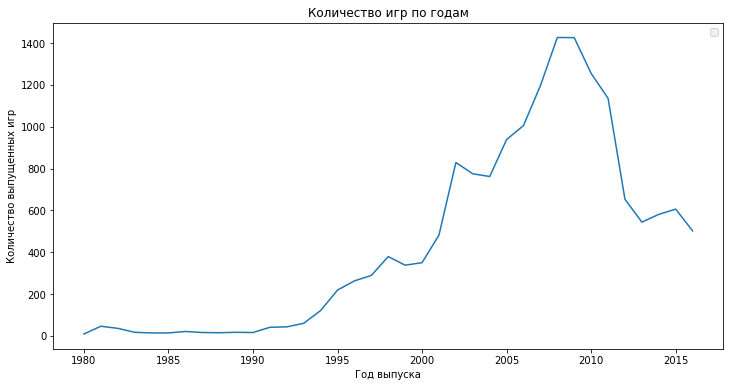

In [18]:
#затем график:
plt.figure(figsize=(12,6))
sns.lineplot(data=games_pro_year)
sns.set_style('darkgrid')
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('');

Количество выпускаемых игр начало расти в 90-е гг. (вероятно, в связи с развитием компьютерных технологий) и достигло максимума в 2008 (1427 игр), затем начался спад (предположительно из-за распространения онлайн-игр и мобильных приложений). Данные за период с 1980 до 2000 не представляют важными в связи с низким объемом производства игр. 

Посмотрим, как менялись продажи по платформам за все периоды, для этого сначала определим топ-10 платформ с наибольшими суммарными продажами:

In [19]:
sales= data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
top_ten = sales.head(10)
top_ten

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Посмотрим распределение по годам для каждой платформы из топ-10:

In [20]:
platform_grouped = top_ten.reset_index()
top_ten_list = platform_grouped['platform'].unique()
top_ten_list

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS'], dtype=object)

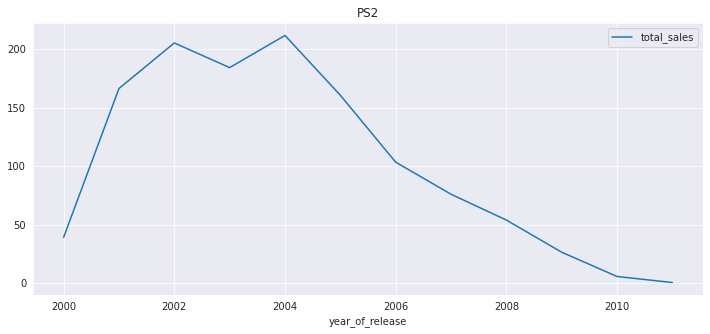

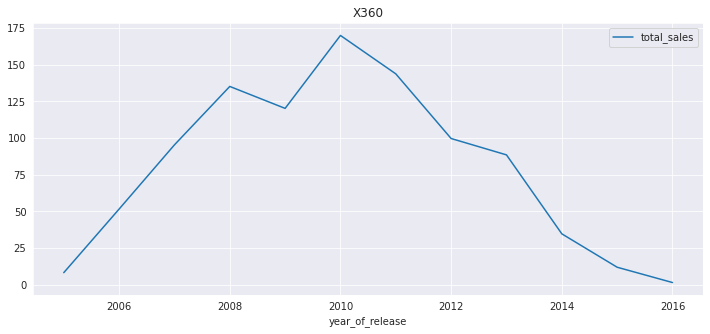

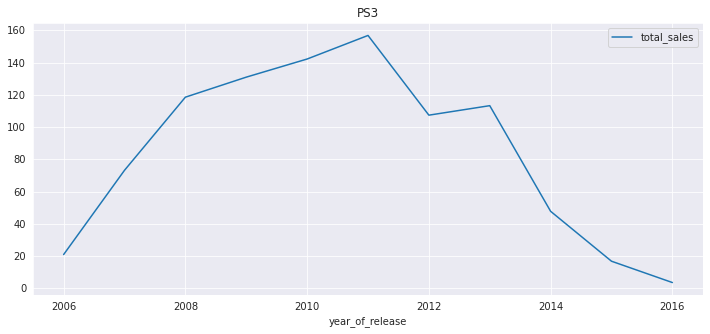

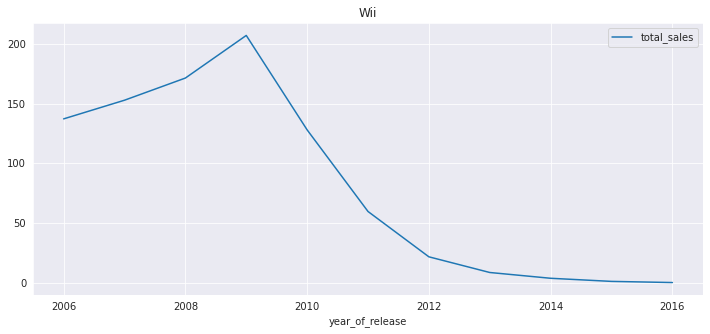

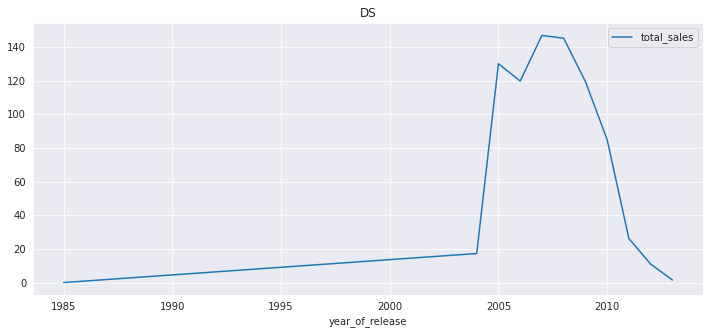

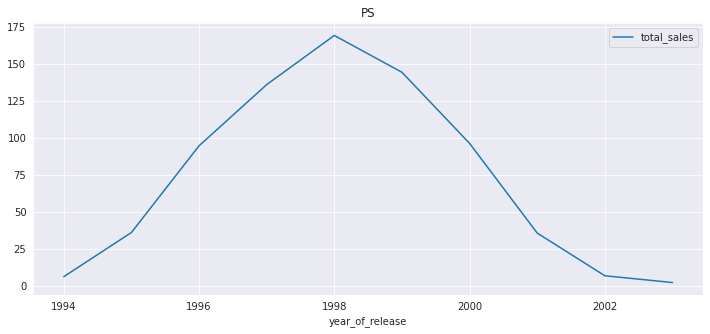

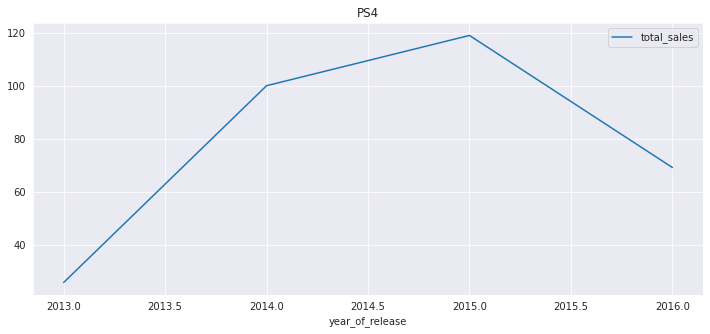

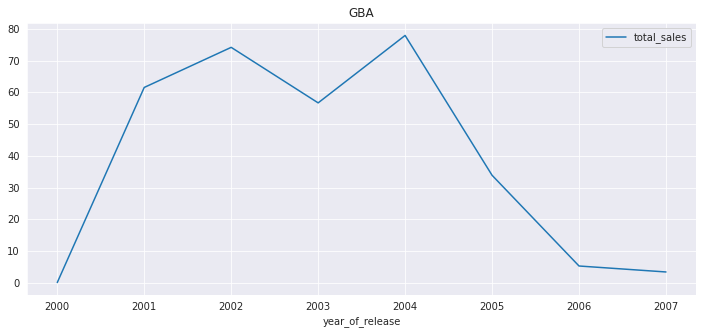

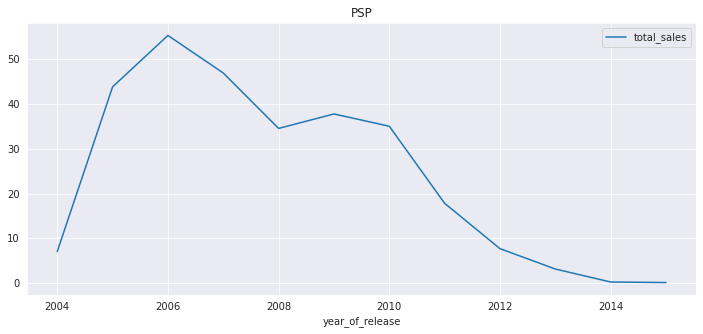

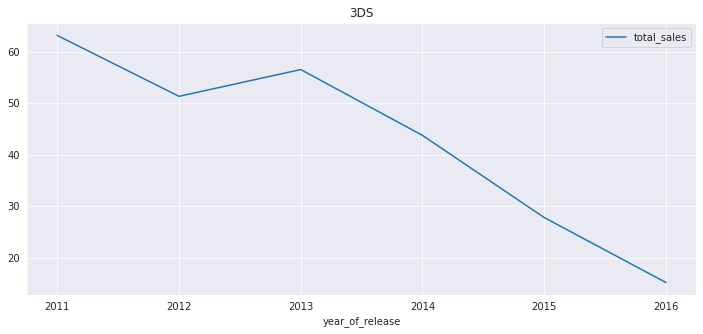

In [21]:
for platform in top_ten_list:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        grid=True, figsize=(12, 5))
    plt.title(platform)

**Определение актуального периода**

Определим средний "срок жизни" платформы на примере топ-10. Для этого создадим список из значений "срока жизни" на основании графика каждой платформы (напр., PS2: 2011 - 200 = 11). Так как DS явный долгожитель (с 1985 по 2012) и сильно выбивается из всей десятки, посчитаем средний срок еще раз, исключив эту платформу:

In [22]:
platform_lifetime = [11,11,10,10,13,3,7,10,5] 
res_mean = statistics.mean(platform_lifetime) 
print('Cредний срок жизни платформы:',res_mean)

Cредний срок жизни платформы: 8.88888888888889


Таким образом можно сделать вывод, что в среднем игровые платформы живут 9 лет с момента выхода на рынок до прекращения выпуска игр для платформы. Однако для целей прогнозирования продаж на следующий год это слишком большой период, т.к. индустрия компьютерных игр быстро меняется. Поэтому будем считать актуальным период в последние 4 года, т.е. с 2012г.

**Определение потенциально прибыльных платформ**

Посмотрим лидеров продаж по актуальному периоду:

In [23]:
#срез данных за актуальный период:
relevant_years = (data['year_of_release'] >= 2011)
relevant_games = data.loc[relevant_years]
relevant_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undefined,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01


In [24]:
relevant_games['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU', 'PC',
       'PSV', 'PSP', 'PS2'], dtype=object)

За актуальный период выпускались игры на 12 платформах. Построим общий график продаж и выведем топ-5 платформ за актуальный период:

In [25]:
#cводная 
relevant_platform = data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').\
    query('year_of_release>=2011').fillna(0).reset_index()
relevant_platform['year_of_release'] = relevant_platform['year_of_release'].astype('Int64')

for column in relevant_platform.columns:
    if relevant_platform[column].sum()==0:
        relevant_platform.drop(column, axis=1,inplace=True)

relevant_platform

platform,year_of_release,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2011,63.20,26.18,35.03,0.45,156.78,0.00,17.82,4.63,59.65,0.00,143.84,0.00
1,2012,51.36,11.01,23.22,0.00,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2,2013,56.57,1.54,12.38,0.00,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
3,2014,43.76,0.00,13.28,0.00,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
4,2015,27.78,0.00,8.52,0.00,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
5,2016,15.14,0.00,5.25,0.00,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


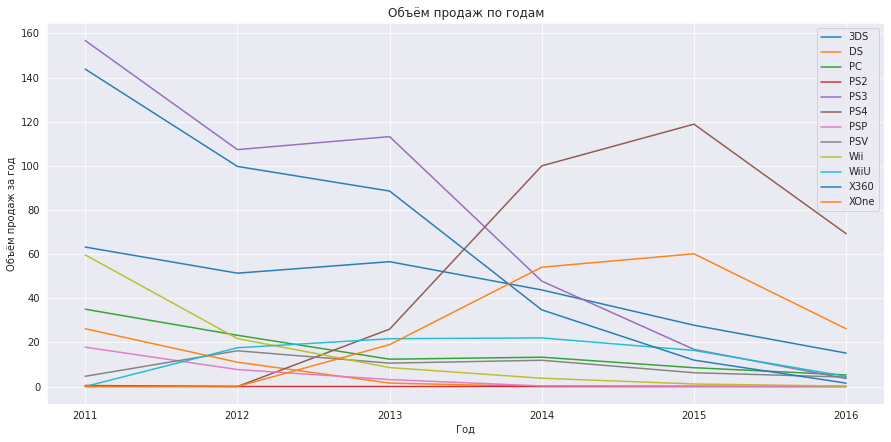

In [26]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title('Объём продаж по годам')

i=0
for column in relevant_platform.columns[1:]:
    plt.plot(relevant_platform['year_of_release'].to_list(), relevant_platform[column].to_list(), label=column, alpha=0.95);
    i+=1 

plt.grid()
plt.xlabel('Год')    
plt.ylabel('Объём продаж за год')
plt.legend()
plt.show()

In [27]:
#определим топ-5 платформ по продажам за период:
top_five_platforms = relevant_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).head(5)
top_five_platforms = top_five_platforms.reset_index().rename_axis(None, axis=1)
top_five_platforms

,platform,total_sales
0,PS3,445.57
1,X360,380.38
2,PS4,314.14
3,3DS,257.81
4,XOne,159.32


На графике видно, что большая часть платформ на спаде, в том числе и лидирующие по продажам из топ-5 PS3 и X360. Выделяются платформы PS4 и XOne, которые были выпущены сравнительно недавно и еще не прошли полный жизненный цикл. Определим эти топ-5 как потенциально прибыльные.  

Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам из топ-5:

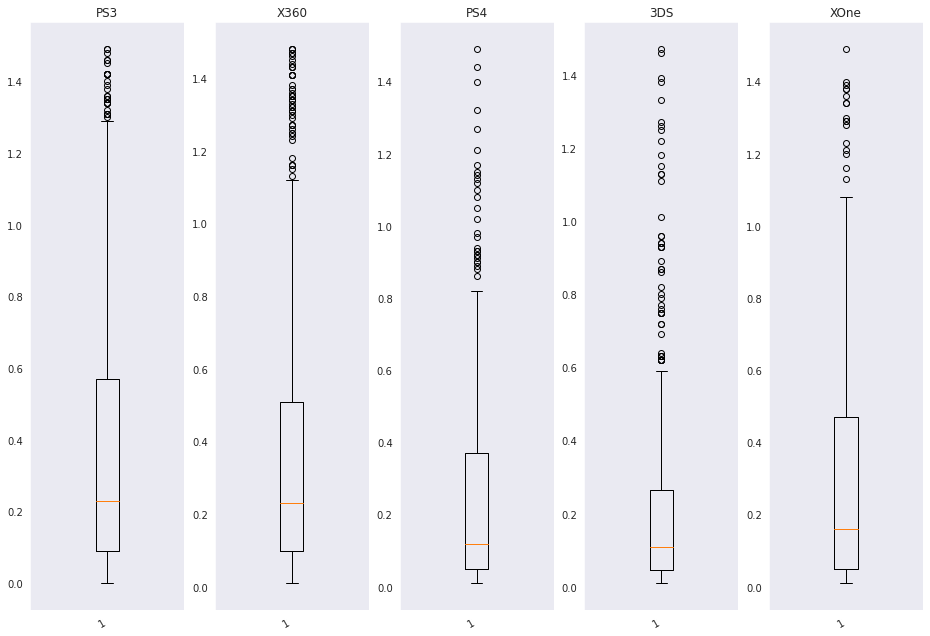

In [28]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(16, 12))
fig.autofmt_xdate();

p = {ax1:'PS3', ax2:'X360', ax3:'PS4', ax4:'3DS', ax5:'XOne'}
for ax in [ax1, ax2, ax3, ax4, ax5]:
    sales = data.query('platform==@p[@ax] and total_sales<1.5')['total_sales']
    ax.boxplot(sales)
    ax.grid()
    ax.set_title(p[ax])

fig.autofmt_xdate()

Медианные значения продаж у платформ PS3, X360 и XOne близки к 0,2, а у PS4 и 3DS - к 0,1. Лидер продаж - PS3, X360, XOne.

**Влияние отзывов пользователей и критиков на продажи**

Посмотрим, как отзывы пользователей и критиков влияют на продажи на примере PS3:

In [29]:
#соберем таблицу с нужными данными по PS3:
ps3 = relevant_games.query('platform=="PS3"')[['total_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
ps3

,total_sales,critic_score,user_score
0,21.05,97.0,8.2
1,13.79,83.0,5.3
2,13.33,88.0,3.2
3,9.36,71.0,2.6
4,8.17,88.0,6.6
...,...,...,...
337,0.02,69.0,7.9
338,0.02,67.0,6.8
339,0.02,50.0,5.0
340,0.01,73.0,6.9


In [30]:
#рассчитаем корреляцию:
ps3.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.376285,0.025189
critic_score,0.376285,1.000000,0.563315
user_score,0.025189,0.563315,1.000000


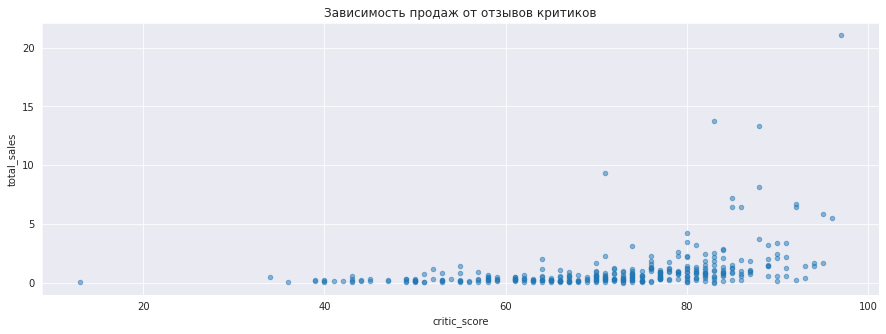

In [31]:
ps3.plot(x='critic_score',y='total_sales',kind='scatter',figsize=(15,5), alpha=0.5)
plt.title('Зависимость продаж от отзывов критиков');

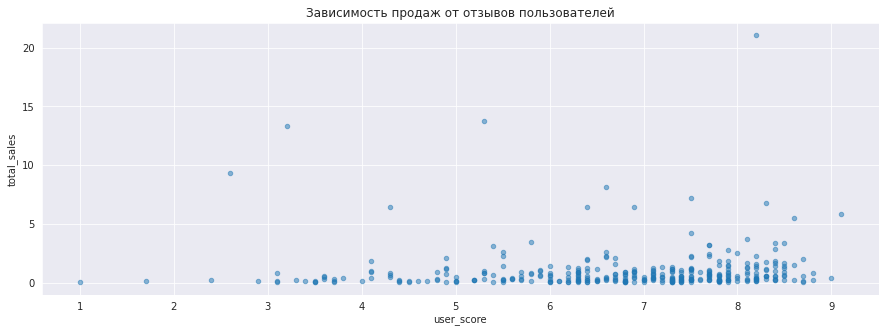

In [32]:
ps3.plot(x='user_score',y='total_sales',kind='scatter',figsize=(15,5), alpha=0.5)
plt.title('Зависимость продаж от отзывов пользователей');

Между продажами игр на платформе PS3 и отзывами критиков есть прямая зависимость, но слабая (коэффициент корреляции всего 0.38). Отзывы пользователей же практически не влияют на продажи (коэффициент корреляции 0.025). 

Сравним полученные выводы с продажами игр на других платформах из топ-5.

In [33]:
four_platforms = ['X360', 'PS4', '3DS', 'XOne']
for i in four_platforms:
    display(relevant_games.query('platform == @i')[["total_sales", "critic_score", "user_score"]].corr())

,total_sales,critic_score,user_score
total_sales,1.000000,0.391253,0.038918
critic_score,0.391253,1.000000,0.568386
user_score,0.038918,0.568386,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.348740,0.222078
critic_score,0.348740,1.000000,0.745222
user_score,0.222078,0.745222,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


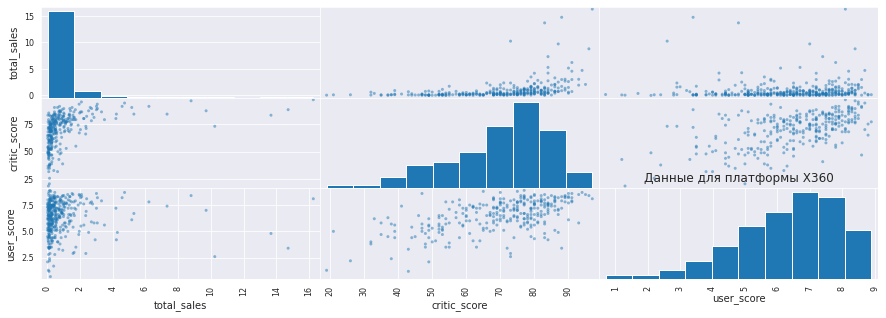

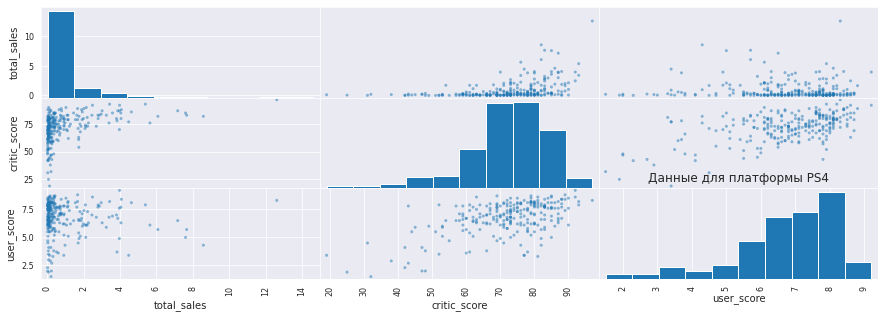

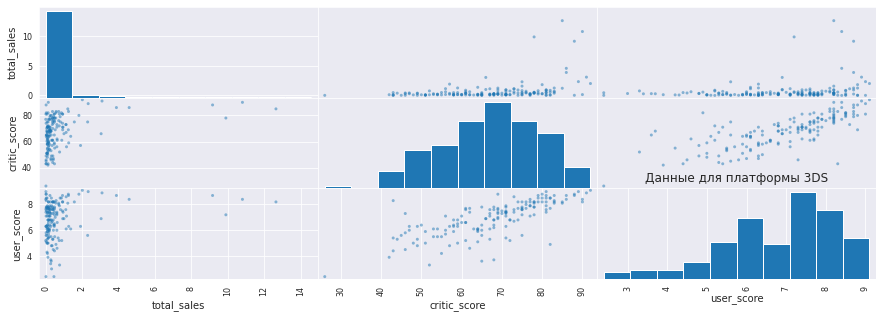

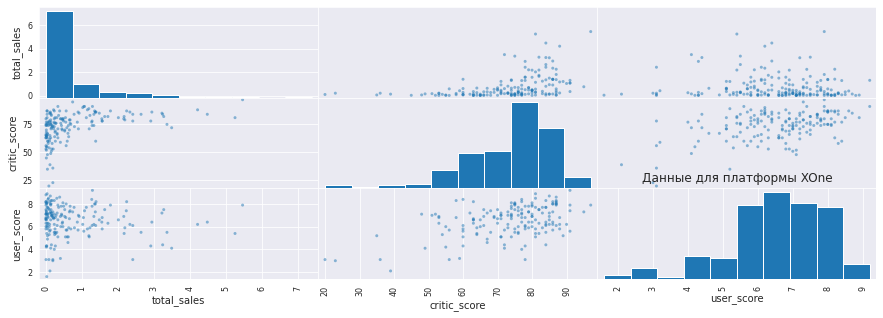

In [34]:
for i in four_platforms:
    pd.plotting.scatter_matrix(relevant_games.query('platform == @i')
                               [['total_sales', 'critic_score', 'user_score']],figsize=(15,5), alpha=0.5)
    plt.title('Данные для платформы {}'.format(i))

На других платформах из топ-5 мы видим такую же картину: слабая прямая зависимость продаж от отзывов критиков (макс. коэф. корреляции у XOne - 0,42, но он все равно ниже 0,5) и почти нулевая корреляция с отзывами пользователей. У XOne и PS4 даже отрицательная корреляция: -0.07 и -0.032 соответственно. 

Таким образом,отзывы критиков незначительно влияют на продажи внутри платформ. Связь продаж с отзывами пользователей практически отсутствует.

**Определение самых прибыльных жанров**

Проанализируем распределение игр по жанрам. Определим самые прибыльные жанры. 

In [35]:
genres = relevant_games.groupby('genre')['name'].count().sort_values(ascending=False)
genres

genre
Action          1269
Role-Playing     465
Adventure        410
Sports           389
Misc             375
Shooter          329
Racing           180
Fighting         159
Simulation       136
Platform         122
Strategy         117
Puzzle            71
Name: name, dtype: int64

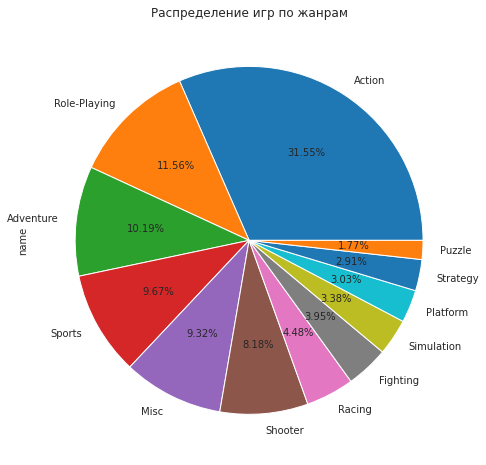

In [36]:
genres.plot(figsize=(15,8), kind="pie",autopct="%.2f%%")
plt.title('Распределение игр по жанрам');

In [37]:
genre_sales = relevant_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales

genre
Action          557.80
Shooter         402.91
Role-Playing    245.63
Sports          237.15
Misc            139.42
Platform         88.68
Racing           88.31
Fighting         66.90
Simulation       50.26
Adventure        45.04
Strategy         22.16
Puzzle            9.85
Name: total_sales, dtype: float64

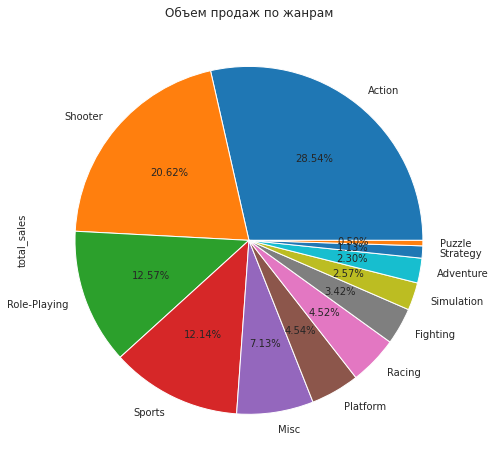

In [38]:
genre_sales.plot(kind="pie",figsize=(15,8), autopct="%.2f%%")
plt.title('Объем продаж по жанрам');

Общее распределение игр по жанрам: лидирует Action (почти 32% от общего числа игр),за ним с некоторым отрывом идут Role-Playing и Adventure. Совсем мало игр в жанре Puzzle.

Лидер продаж снова Action (возможно, потому что больше всего игр выпускается в этом жанре), с небольшим отрывом на втором месте Shooter (высокая популярность жанра у игроков), на третьем месте с некоторым отрывом Role-Playing. Удивительно, что Adventure на третьем месте по выпуску игр, но продажи совсем незначительные. Puzzle и здесь замыкает рейтинг.

**Вывод**

Производство компьютерных игр начало расти в 90-е гг. и достигло максимума в 2008, затем начался спад. В среднем игровые платформы живут 9 лет. За актуальный период взят срок в 4 года. Отзывы критиков незначительно влияют на продажи внутри платформ. Связь продаж с отзывами пользователей практически отсутствует. Платформы-лидеры в актуальном периоде: PS3, X360, PS4. Жанр-лидер по выпуску и продажам - Action.

## Портрет пользователя каждого региона

Определим топ-5 самых популярных платформ в каждом регионе.

Запишем в словарь top_five_platforms данные по продажам топ-5 платформ в 3 регионах:

In [39]:
top_five_platforms = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_five_platforms[region] = relevant_games.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
top_five_platforms

{'na_sales': platform
 X360    226.80
 PS3     168.26
 PS4     108.74
 XOne     93.12
 3DS      82.65
 Name: na_sales, dtype: float64,
 'eu_sales': platform
 PS3     163.10
 PS4     141.09
 X360    117.10
 3DS      61.27
 PC       56.70
 Name: eu_sales, dtype: float64,
 'jp_sales': platform
 3DS    100.62
 PS3     49.39
 PSP     24.04
 PSV     21.84
 PS4     15.96
 Name: jp_sales, dtype: float64}

Построим круговые диаграммы:

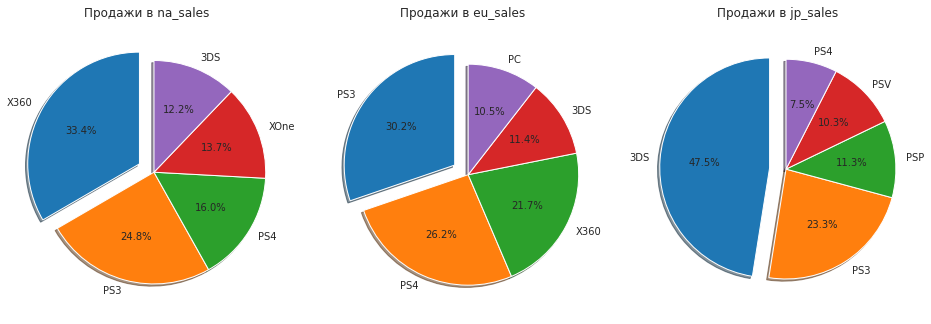

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

for i in [0,1,2]:
    labels = top_five_platforms[region[i]].index
    sizes = top_five_platforms[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90) 
    ax.axis('equal')  

plt.show()

В регионах совершенно разные популярные платформы на 1 месте: в Северной Америке - X360, в Европе - PS3, в Японии - японцами же и производимая 3DS. Вторая по популярности платформа во всех регионах - PlayStation.

Аналогичным образом определим самые популярные жанры:

In [41]:
top_five_genres = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_five_genres[region] = relevant_games.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
top_five_genres

{'na_sales': genre
 Action          230.92
 Shooter         194.43
 Sports          108.70
 Role-Playing     83.78
 Misc             69.69
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Action          199.12
 Shooter         148.02
 Sports           88.48
 Role-Playing     62.30
 Racing           40.58
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Role-Playing    79.87
 Action          63.62
 Misc            17.60
 Fighting        12.38
 Platform        12.13
 Name: jp_sales, dtype: float64}

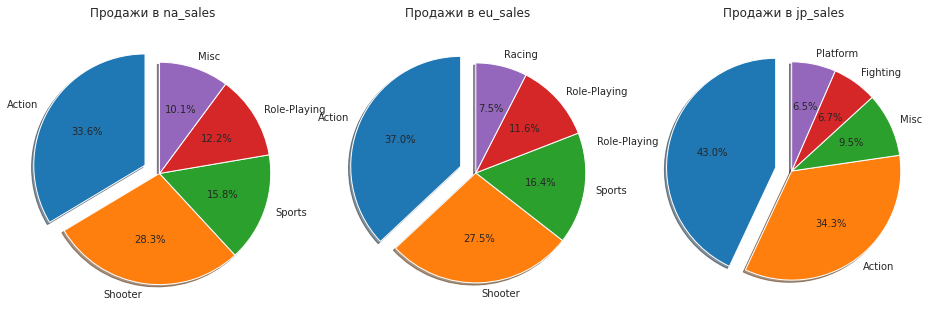

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

for i in [0,1,2]:
    labels = top_five_genres[region[i]].index
    sizes = top_five_genres[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90) 
    ax.axis('equal')  

plt.show()

В Северной Америке и Европе одинаковые топ-3 жанра: Action, Shooter и Sports. В Японии же, где совершенно другая культура и менталитет, лидирует жанр Role-Playing, а Action на втором месте. 

Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе:

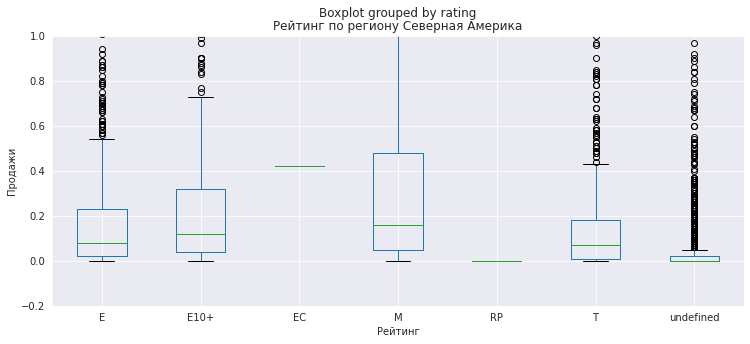

In [43]:
#Америка
relevant_games.boxplot(column='na_sales', by='rating', figsize=(12,5))
plt.ylim(-0.2, 1)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.title('Рейтинг по региону Северная Америка')
plt.show;

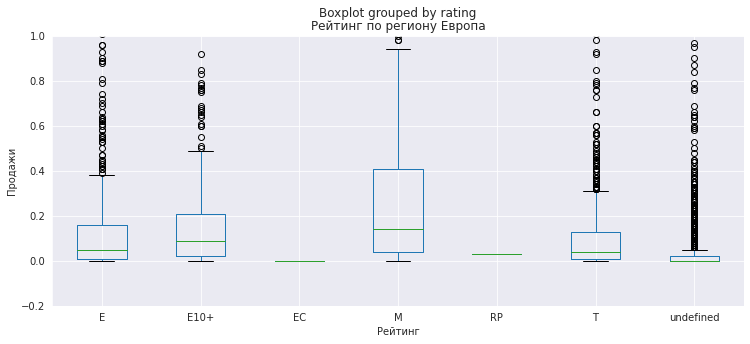

In [44]:
#Европа
relevant_games.boxplot(column='eu_sales', by='rating', figsize=(12,5))
plt.ylim(-0.2, 1)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.title('Рейтинг по региону Европа')
plt.show;

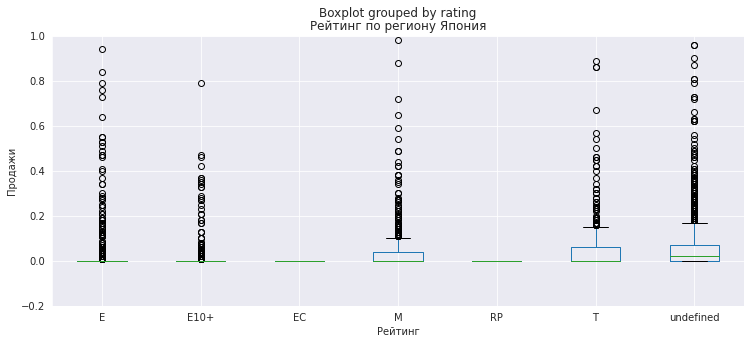

In [45]:
#Япония
relevant_games.boxplot(column='jp_sales', by='rating', figsize=(12,5))
plt.ylim(-0.2, 1)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.title('Рейтинг по региону Япония')
plt.show;

В Северной Америке и Европе по продажам лидируют игры с рейтингом M ("Для взрослых"), E10+("Для всех от 10 лет и старше") и E("Для всех"). В Японии много игр с рейтингом М и Т("Подросткам").

**Вывод**

Вкусы пользователей из Северной Америки и Европы во многом схожи. От них отличаются вкусы японских  игроков. В силу другого менталитета там популярны другие жанры, наиболее привлекательна "отечественная" консоль Nintendo DS, многие игры не выпускаются вообще. 

## Проверка гипотез

**Гипотеза 1**

Нулевая гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.


In [46]:
#Сформируем списки для обeих платформ:
XOne = relevant_games.query(' platform == "XOne" ')['user_score'].dropna().to_list()
PC = relevant_games.query(' platform == "PC" ')['user_score'].dropna().to_list()

In [47]:
#проверим дисперсии:
print('Дисперсия XOne:',np.var(XOne))
print('Дисперсия PC:',np.var(PC))

Дисперсия XOne: 1.8965188383045526
Дисперсия PC: 2.5878388099608483


Дисперсии отличаются незначительно.

Так как нам не нужны сверхточные значения, то укажем критический уровень статистической значимости 5% alpha = 0.05

In [48]:
alpha = .05
results = st.ttest_ind(XOne, PC)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6267602271422398
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергается. Гипотеза 1 подтверждена: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Проверим результат, выведя среднее значение:

In [49]:
relevant_games.query(' platform == "XOne" ')['user_score'].mean()

6.521428571428572

In [50]:
relevant_games.query(' platform == "PC" ')['user_score'].mean()

6.451791530944625

Средние рейтинги действительно почти одинаковые.

**Гипотеза 2** 

Нулевая гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports одинаковые. 

Альтернативная гипотеза 2: Средние пользовательские рейтинги платформ жанров Action и Sports разные.

In [51]:
#Сформируем списки для обоих жанров:
Action = relevant_games.query(' genre == "Action" ')['user_score'].dropna().to_list()
Sports = relevant_games.query('genre == "Sports" ')['user_score'].dropna().to_list()

In [52]:
#проверим дисперсии:
print('Дисперсия Action:',np.var(Action))
print('Дисперсия Sports:',np.var(Sports))

Дисперсия Action: 1.8091482798664535
Дисперсия Sports: 2.87079202194461


Дисперсии отличаются незначительно. Так как нам не нужны сверхточные значения, то укажем критический уровень статистической значимости 5% alpha = 0.05

In [53]:
alpha = .05
results = st.ttest_ind(Action, Sports)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.1974550252152054e-24
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, т.е. средние пользовательские рейтинги платформ жанров Action и Sports разные. Гипотеза 2 подтверждена.

Проверим результат, выведя среднее значение:

In [54]:
relevant_games.query(' genre == "Action" ')['user_score'].mean()

6.775903614457831

In [55]:
relevant_games.query(' genre == "Sports" ')['user_score'].mean()

5.650813008130081

Средние рейтинги действительно различаются.

**Вывод**

Обе гипотезы подтверждены. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Средние пользовательские рейтинги жанров Action и Sports разные. 

## Общий вывод

На этапе предобработки данных:
- привели названия столбцов к нижнему регистру;
- удалили пропуски в столбцах name, year_of_release;
- пропуски в столбце rating заменили на категориальную переменную;
- в столбце user_score заменили tbd на nan;
- изменили тип данных в столбцах year_of_release и user_score;
- убедились в отсутствии дубликатов.

На этапе расчетов:
- добавили столбец с подсчетом суммарных продаж во всех регионах.

Далее был проведен исследовательский анализ данных:
- рост производства компьютерных игр начался в 90-е гг. и достиг максимума в 2008.
- средний срок жизни платформы составляет 9 лет
- самые популярные консоли в мире - PlayStation и XBox.  
- Наиболее продаваемы игры для взрослых.

Портрет пользователя каждого региона:
- определили топ-5 самых популярных платформ в каждом регионе. 
- на 1 месте Северной Америке - X360, в Европе - PS3, в Японии -3DS. Вторая по популярности платформа во всех регионах - PlayStation.
- определили топ-5 самых популярных жанров: в Северной Америке и Европе топ-3 жанра: Action, Shooter и Sports. В Японии - Role-Playing, Action. 
- в Северной Америке и Европе по продажам лидируют игры с рейтингом M, E10+ и E.В Японии - М и Т.

Проверка гипотез:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
- Средние пользовательские рейтинги жанров Action и Sports разные.

Определение потенциально популярного продукта:
- Потенциально популярны в 2017 г. игры в жанрах Action, Shooter и Sports на платформах PS4 и XOne.
